In [1]:
#SVM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA/ML Practical/Day_2/Social_Network_ads.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [4]:
X = df[['Age','Salary']].values
X.shape

(284, 2)

In [5]:
y = df['Purchased'].values
y.shape

(284,)

In [6]:
from sklearn.preprocessing import StandardScaler
#std score of sample x is calculates as:
# z= (x-u)/s
#u is mean, s is standard deviation

In [7]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [8]:
X_sc[:5,:]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [9]:
sc.inverse_transform(X_sc[0:1,:])

array([[   19., 19000.]])

In [10]:
from sklearn.model_selection import train_test_split

In [32]:

X_train,X_test,y_train,y_test = train_test_split(X_sc,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [33]:
from sklearn.svm import SVC

In [34]:
 #  'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
model = SVC(C=1, kernel= 'rbf')
model.fit(X_train, y_train).score(X_test, y_test)

0.9122807017543859

In [35]:
age = np.arange(X_test[:,0].min()-0.2,X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2,X_test[:,1].max()+0.2,0.01)
Age , Sal  = np.meshgrid(age, sal)
print(Age.shape, Sal.shape)

(408, 424) (408, 424)


In [36]:
formed_data = np.c_[Age.ravel(),Sal.ravel()]
Z1 = model.predict(formed_data).reshape(Age.shape) 
Z1.shape

(408, 424)

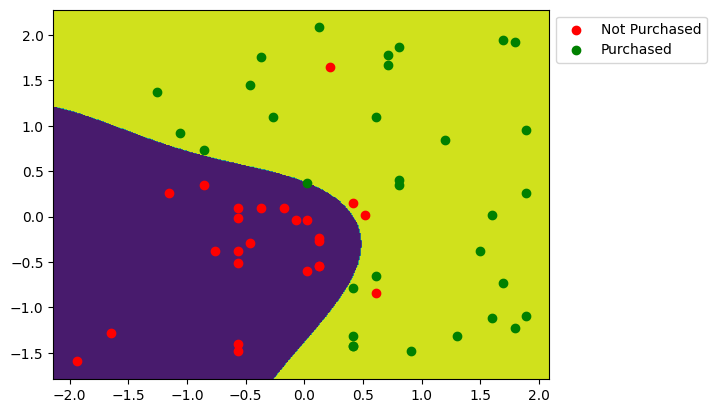

In [37]:
plt.contourf(Age, Sal, Z1)
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c = 'r', label ="Not Purchased")
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c = 'Green', label ="Purchased")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
################

In [ ]:
model = SVC(C = 1, kernel = 'rbf') #kernel = 'rbf','sigmoid'
model.fit(X_train,y_train).score(X_test,y_test)

age = np.arange(X_test[:,0].min()-0.2,X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2,X_test[:,1].max()+0.2,0.01)
Age , Sal  = np.meshgrid(age, sal)
print(Age.shape, Sal.shape)

formed_data = np.c_[Age.ravel(),Sal.ravel()]
Z1 = model.predict(formed_data).reshape(Age.shape) 
Z1.shape


plt.contourf(Age, Sal, Z1)
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c = 'r', label ="Not Purchased")
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c = 'Green', label ="Purchased")
plt.legend(bbox_to_anchor=(1,1))
plt.show()